In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [110]:
data = 'train.csv'
train = pd.read_csv(data)
data = 'test.csv'
test = pd.read_csv(data)
#names = ['code', 'clump-thickness', 'cell-size', 'cell-shape', 'marginal-adhesion',
#df.columns = names

In [111]:
print(min(train['Age']))
print(max(train['Age']))
print(min(train['Flight Distance']))
print(max(train['Flight Distance']))
print(max(train['Departure Delay in Minutes']))
print(max(train['Arrival Delay in Minutes']))
train.describe()


7
85
31
4983
1592
1584.0


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


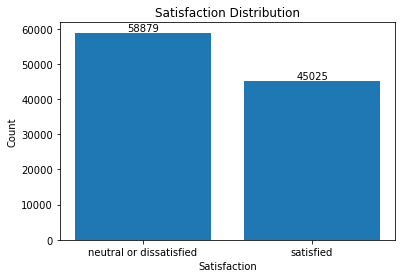

In [145]:
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Satisfaction Distribution')
bar = plt.bar(['neutral or dissatisfied','satisfied'],np.array(train.groupby(['satisfaction']).size()))
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.savefig('Satisfactionbar.png',bbox_inches='tight',pad_inches=.5)
plt.show()


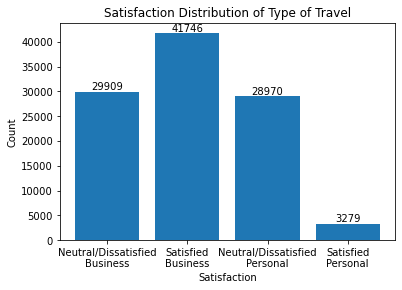

In [148]:
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Satisfaction Distribution of Type of Travel')
bar = plt.bar(['Neutral/Dissatisfied\nBusiness','Satisfied\nBusiness','Neutral/Dissatisfied\nPersonal','Satisfied\nPersonal'],np.array(train.groupby(['Type of Travel', 'satisfaction']).size()))
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.savefig('typeoftravelbar.png',bbox_inches='tight',pad_inches=.5)
plt.show()


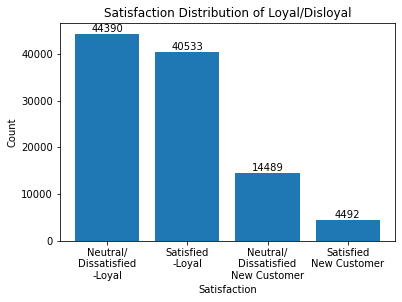

In [146]:
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Satisfaction Distribution of Loyal/Disloyal')
bar = plt.bar(['Neutral/\nDissatisfied\n-Loyal','Satisfied\n-Loyal','Neutral/\nDissatisfied\nNew Customer','Satisfied\nNew Customer'],np.array(train.groupby(['Customer Type', 'satisfaction']).size()))
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.savefig('loyaltybar.png',bbox_inches='tight',pad_inches=.5)
plt.show()

In [154]:
print(train.groupby(['Type of Travel'])['Departure Delay in Minutes'].mean())
print()
print(train.groupby(['Type of Travel','Class']).size())


Type of Travel
Business travel    14.954937
Personal Travel    14.506062
Name: Departure Delay in Minutes, dtype: float64

Type of Travel   Class   
Business travel  Business    47508
                 Eco         20257
                 Eco Plus     3890
Personal Travel  Business     2157
                 Eco         26488
                 Eco Plus     3604
dtype: int64


In [93]:
X_train = train.iloc[:,1:24]
X_test = test.iloc[:,1:24]

In [94]:
y_train = train.iloc[:,24]
y_test = test.iloc[:,24]


In [95]:
X_train['Gender'] = X_train['Gender'].replace(to_replace='Male', value=1)
X_train['Gender'] = X_train['Gender'].replace(to_replace='Female', value=0)

X_train['Customer Type'] = X_train['Customer Type'].replace(to_replace='Loyal Customer', value=1)
X_train['Customer Type'] = X_train['Customer Type'].replace(to_replace='disloyal Customer', value=0)

X_train['Age']=pd.cut(x=X_train['Age'], bins=[0,10,20,30,40,50,60,70,80,90],
                      labels= [0,1,2,3,4,5,6,7,8])

X_train['Type of Travel'] = X_train['Type of Travel'].replace(to_replace='Business travel', value=0)
X_train['Type of Travel'] = X_train['Type of Travel'].replace(to_replace='Personal Travel', value=1)

X_train['Class'] = X_train['Class'].replace(to_replace='Eco', value=0)
X_train['Class'] = X_train['Class'].replace(to_replace='Business', value=1)
X_train['Class'] = X_train['Class'].replace(to_replace='Eco Plus', value=2)

X_train['Flight Distance']=pd.cut(x=X_train['Flight Distance'], bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000],
                      labels= [0,1,2,3,4,5,6,7,8,9])

X_train['Departure Delay in Minutes']=pd.cut(x=X_train['Departure Delay in Minutes'], bins=[0,30,90,270,810,2430],
                      labels= [0,1,2,3,4])

X_train['Arrival Delay in Minutes']=pd.cut(x=X_train['Arrival Delay in Minutes'], bins=[0,30,90,270,810,2430],
                      labels= [0,1,2,3,4])

y_train = y_train.replace(to_replace='neutral or dissatisfied', value=0)
y_train = y_train.replace(to_replace='satisfied', value=1)

In [96]:
X_test['Gender'] = X_test['Gender'].replace(to_replace='Male', value=1)
X_test['Gender'] = X_test['Gender'].replace(to_replace='Female', value=0)

X_test['Customer Type'] = X_test['Customer Type'].replace(to_replace='Loyal Customer', value=1)
X_test['Customer Type'] = X_test['Customer Type'].replace(to_replace='disloyal Customer', value=0)

X_test['Age']=pd.cut(x=X_test['Age'], bins=[0,10,20,30,40,50,60,70,80,90],
                      labels= [0,1,2,3,4,5,6,7,8])

X_test['Type of Travel'] = X_test['Type of Travel'].replace(to_replace='Business travel', value=0)
X_test['Type of Travel'] = X_test['Type of Travel'].replace(to_replace='Personal Travel', value=1)

X_test['Class'] = X_test['Class'].replace(to_replace='Eco', value=0)
X_test['Class'] = X_test['Class'].replace(to_replace='Business', value=1)
X_test['Class'] = X_test['Class'].replace(to_replace='Eco Plus', value=2)

X_test['Flight Distance']=pd.cut(x=X_test['Flight Distance'], bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000],
                      labels= [0,1,2,3,4,5,6,7,8,9])

X_test['Departure Delay in Minutes']=pd.cut(x=X_test['Departure Delay in Minutes'], bins=[0,30,90,270,810,2430],
                      labels= [0,1,2,3,4])

X_test['Arrival Delay in Minutes']=pd.cut(x=X_test['Arrival Delay in Minutes'], bins=[0,30,90,270,810,2430],
                      labels= [0,1,2,3,4])

y_test = y_test.replace(to_replace='neutral or dissatisfied', value=0)
y_test = y_test.replace(to_replace='satisfied', value=1)

In [97]:
from sklearn.neural_network import  MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (10,10,10), max_iter=1500).fit(X_train, y_train)

In [98]:
from sklearn.model_selection import cross_val_score
print("cross Validation scores") 
cross_val_score(clf,X_train,y_train,cv=5)

cross Validation scores


array([0.56681584, 0.57345652, 0.56368798, 0.55213897, 0.51790183])

In [100]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
prediction = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test,prediction))
print("Classification Report:")
print(classification_report(y_test,prediction))

Confusion Matrix:
[[14283   290]
 [11100   303]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.71     14573
           1       0.51      0.03      0.05     11403

    accuracy                           0.56     25976
   macro avg       0.54      0.50      0.38     25976
weighted avg       0.54      0.56      0.42     25976



In [102]:
parameters = {
'solver':  ['adam', 'lbfgs', 'sgd'],
'max_iter': [1500],
'hidden_layer_sizes': [(10,10,10), (10, 5), (5,5), (100, 10, 50),(5,5,5,5,5,5)],
'alpha': [.1, .005],
'learning_rate': ['constant', 'adaptive']
}

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
#This ran, and the output was saved, but to save runtime, the best parameters found are now 
#just assigned to gs instead of actually running
#gs = GridSearchCV(estimator=clf, param_grid=parameters, cv=3).fit(X_train, y_train)
#print("Best parameters set found on development set:")
#print()
#print(gs.best_params_)
gs = MLPClassifier(alpha = .005, hidden_layer_sizes = (100,10,50), max_iter=1500).fit(X_train, y_train)

In [104]:
print("Best parameters set found on development set:{'alpha': 0.005, 'hidden_layer_sizes': (100, 10, 50), 'learning_rate': 'adaptive', 'max_iter': 1500, 'solver': 'adam'}")
#print("Grid scores on development set:")
#print()
#means = gs.cv_results_['mean_test_score']
#stds = gs.cv_results_['std_test_score']
#means = pd.read_csv('means.csv')
#stds = pd.read_csv('stds.csv')
#for mean, std, params in zip(means, stds, gs.cv_results_['params']):
#    print("Mean: %0.3f Std Dev: (+/-%0.03f) for the following Parameters: %r"
#        % (mean, std * 2, params))


Best parameters set found on development set:{'alpha': 0.005, 'hidden_layer_sizes': (100, 10, 50), 'learning_rate': 'adaptive', 'max_iter': 1500, 'solver': 'adam'}


'5.755981495227856515e-01'

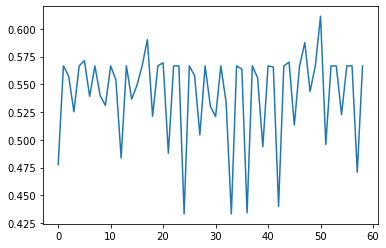

In [73]:
#np.savetxt("means.csv", means, delimiter=",")
#np.savetxt("stds.csv", stds, delimiter=",")
plt.plot(means)
plt.savefig('gridsearch.png')
#max(means)

In [106]:
prediction = gs.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test,prediction))
print("Classification Report:")
print(classification_report(y_test,prediction))

Confusion Matrix:
[[14573     0]
 [11403     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72     14573
           1       0.00      0.00      0.00     11403

    accuracy                           0.56     25976
   macro avg       0.28      0.50      0.36     25976
weighted avg       0.31      0.56      0.40     25976



C:\Users\Logan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

array(['neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied', ..., 'neutral or dissatisfied',
       'neutral or dissatisfied', 'neutral or dissatisfied'], dtype='<U23')

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64